## Pseudo-Inverse approach and linear regression

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load PCA data
df = pd.read_csv("Transformed_PCA_Data.csv")
print("Data shape:", df.shape)
df.head()


Data shape: (500, 4)


,PC_pred_1,PC_pred_2,Arrivals,Departures
0,0.547253,1.409786,33,24
1,-0.562123,-0.813829,33,35
2,1.193815,0.737969,45,54
3,1.784059,0.121226,63,44
4,-1.717889,0.554911,33,21


In [56]:
features = ["PC_pred_1", "PC_pred_2"]
targets  = ["Arrivals", "Departures"]

X = df[features].to_numpy()
Y = df[targets].to_numpy()

print("Feature matrix X shape:", X.shape)
print("Target matrix Y shape: ", Y.shape)


Feature matrix X shape: (500, 2)
Target matrix Y shape:  (500, 2)


Splitting the data into train/test.

In [57]:
ones = np.ones((X.shape[0], 1))
A = np.hstack([ones, X])

train_A, test_A, train_Y, test_Y = train_test_split(
    A, Y, test_size=0.2, shuffle=False
)
print("Train X:", train_X.shape)
print("Test  X:", test_X.shape)
print("Train Y:", train_Y.shape)
print("Test  Y:", test_Y.shape)


Train X: (400, 2)
Test  X: (100, 2)
Train Y: (400, 2)
Test  Y: (100, 2)


Here is the core of the model, calculating the Pseudo-Inverse and getting fitted coefficients.

In [58]:
A_pinv = np.linalg.pinv(train_A)
coeff  = A_pinv @ train_Y

print("Coefficient matrix (rows = [intercept, PC1, PC2]):")
print(coeff)


Coefficient matrix (rows = [intercept, PC1, PC2]):
[[40.69890237 38.13147498]
 [ 6.48571598  7.17116581]
 [-2.88901801 -2.53010313]]


In [59]:
train_pred = train_A @ coeff
test_pred  = test_A  @ coeff

print("First 5 true test rows:")
print(test_Y[:5])
print("\nFirst 5 predicted test rows:")
print(test_pred[:5])


First 5 true test rows:
[[32 22]
 [65 55]
 [55 44]
 [40 22]
 [47 41]]

First 5 predicted test rows:
[[32.87267193 29.70657708]
 [41.62140361 39.69196126]
 [46.61539796 44.15541452]
 [26.57146648 23.41861685]
 [39.62292065 37.37265186]]


In [65]:
for j, name in enumerate(targets):
    y_true = test_Y[:, j]
    y_pred = test_pred[:, j]
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    
    print(f"--- {name} ---")
    print(f"MAE:  {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2:  {r2}")
    print()


--- Arrivals ---
MAE:  7.479081280096734
RMSE: 9.570842942827388
R^2:  0.28081312237212164

--- Departures ---
MAE:  6.925060221973346
RMSE: 8.49270956672386
R^2:  0.37041355412331955



In [66]:
full_pred = np.vstack([train_pred, test_pred])
full_true = Y
days = np.arange(len(df))

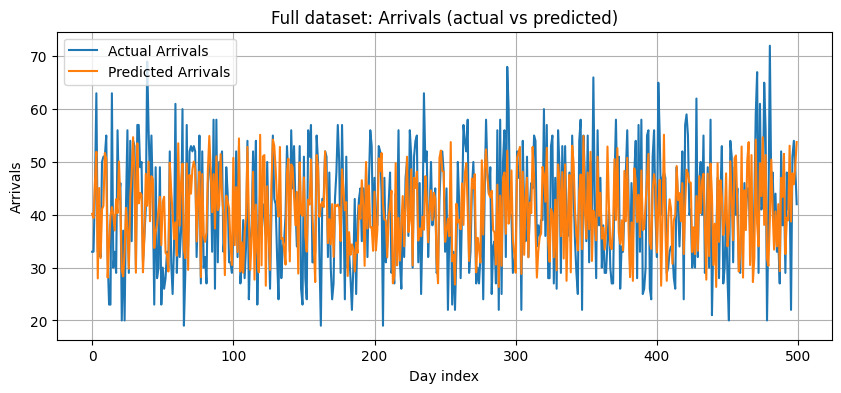

In [62]:
# Arrivals
plt.figure()
plt.plot(days, full_true[:, 0], label="Actual Arrivals")
plt.plot(days, full_pred[:, 0], label="Predicted Arrivals")
plt.xlabel("Day index")
plt.ylabel("Arrivals")
plt.title("Full dataset: Arrivals (actual vs predicted)")
plt.legend()
plt.show()

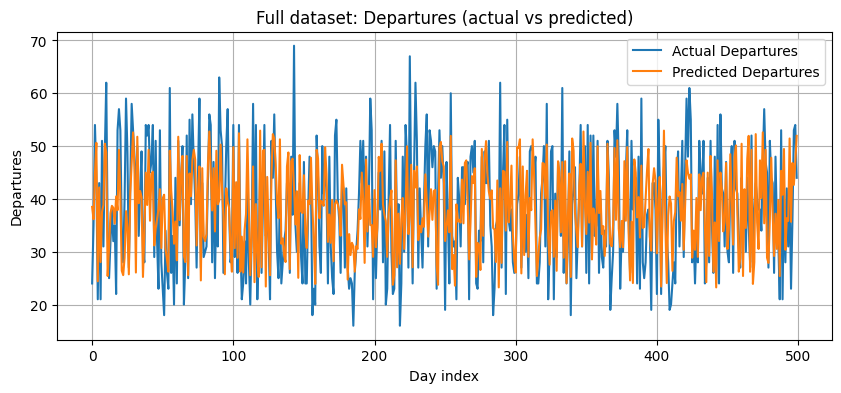

In [63]:
# Departures
plt.figure()
plt.plot(days, full_true[:, 1], label="Actual Departures")
plt.plot(days, full_pred[:, 1], label="Predicted Departures")
plt.xlabel("Day index")
plt.ylabel("Departures")
plt.title("Full dataset: Departures (actual vs predicted)")
plt.legend()
plt.show()